In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
a = np.array([1,3,2,4])
a

array([1, 3, 2, 4])

In [7]:
df = pd.read_csv('data/banknotes.csv')
df

,variace,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [8]:
df['class'].value_counts()
# 0 is real note
# 1 is false note

0    762
1    610
Name: class, dtype: int64

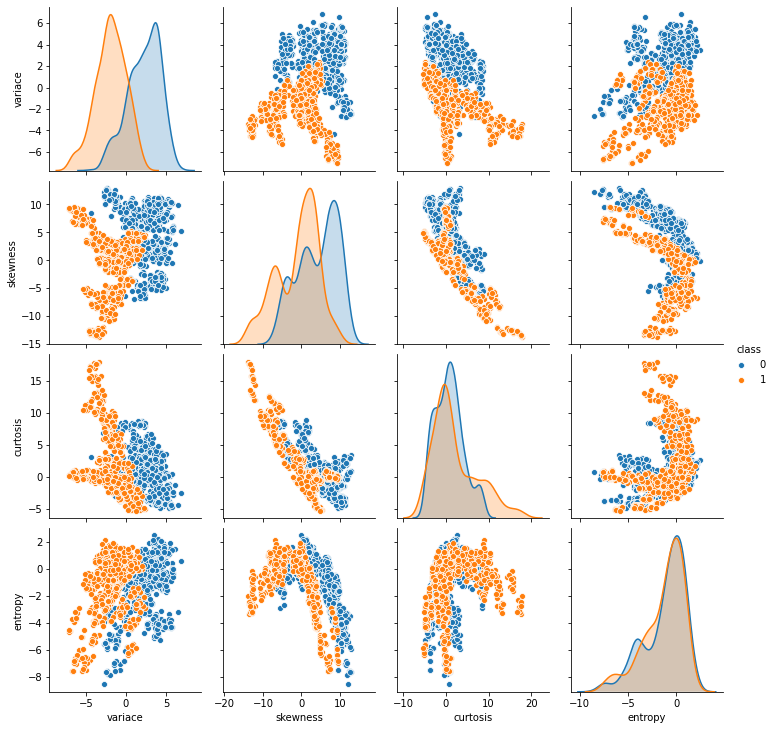

In [9]:
sns.pairplot(df,hue='class')

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [11]:
X = scale(df.drop('class',axis=1).values) # mean of 0 and stdev of 1
y = df['class'].values

In [12]:
X

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [13]:
model = RandomForestClassifier()
cross_val_score(model,X,y)

array([0.99272727, 0.99272727, 0.98905109, 0.99635036, 0.99635036])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [15]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [16]:
K.clear_session()

model = Sequential()


In [17]:

model.add(Dense(1, input_shape=(4,), activation='sigmoid'))


In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
30/30 [==============================] - 0s 605us/step - loss: 0.5328 - accuracy: 0.6730
Epoch 2/10
30/30 [==============================] - 0s 622us/step - loss: 0.4955 - accuracy: 0.7262
Epoch 3/10
30/30 [==============================] - 0s 628us/step - loss: 0.5050 - accuracy: 0.7412
Epoch 4/10
30/30 [==============================] - 0s 685us/step - loss: 0.44

In [20]:

result = model.evaluate(X_test,y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13/13 [==============================] - 0s 593us/step - loss: 0.3555 - accuracy: 0.9126


In [21]:
historydf = pd.DataFrame(history.history,index=history.epoch)

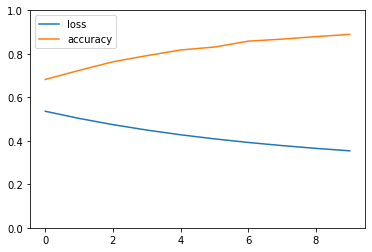

In [22]:
historydf.plot(ylim=(0,1))

In [23]:
history.history

{'loss': [0.5359258055686951,
  0.5030625462532043,
  0.47441622614860535,
  0.44950833916664124,
  0.4278610348701477,
  0.40900593996047974,
  0.392530232667923,
  0.3781050443649292,
  0.36534613370895386,
  0.3540544807910919],
 'accuracy': [0.6822916865348816,
  0.7239583134651184,
  0.7635416388511658,
  0.7916666865348816,
  0.8177083134651184,
  0.831250011920929,
  0.8583333492279053,
  0.8677083253860474,
  0.8791666626930237,
  0.8895833492279053]}

### Learning Rates

In [24]:
dflist = []
learning_rates = [0.01,0.05,0.1,0.5]

for lr in learning_rates:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train,y_train, batch_size=16,verbose=0,epochs=10)
    
    dflist.append(pd.DataFrame(h.history,index=h.epoch))
    


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [25]:
historydf = pd.concat(dflist,axis=1)
metrics_reported = dflist[0].columns
indx = pd.MultiIndex.from_product([learning_rates,metrics_reported],
                                  names=['Learning Rate','Metric'])
historydf.columns = indx

In [26]:
historydf

Learning Rate      0.01                0.05                0.10            \
Metric             loss  accuracy      loss  accuracy      loss  accuracy   
0              0.572115  0.663542  0.336064  0.970833  0.526164  0.720833   
1              0.542083  0.700000  0.251315  0.970833  0.362572  0.843750   
2              0.515326  0.725000  0.215733  0.965625  0.276641  0.901042   
3              0.491142  0.751042  0.193664  0.965625  0.223916  0.937500   
4              0.469290  0.764583  0.177796  0.966667  0.189616  0.952083   
5              0.449293  0.782292  0.165499  0.967708  0.165679  0.957292   
6              0.430950  0.797917  0.155410  0.967708  0.148128  0.960417   
7              0.413994  0.809375  0.146977  0.967708  0.135011  0.967708   
8              0.398291  0.823958  0.139772  0.967708  0.124631  0.969792   
9              0.383736  0.833333  0.133468  0.969792  0.116223  0.969792   

Learning Rate      0.50            
Metric             loss  accuracy  
0              0.283002  0.914583  
1              0.120410  0.969792  
2              0.092217  0.975000  
3              0.078678  0.977083  
4              0.069912  0.978125  
5              0.064547  0.980208  
6              0.060102  0.981250  
7              0.056843  0.980208  
8              0.054452  0.981250  
9              0.052348  0.981250

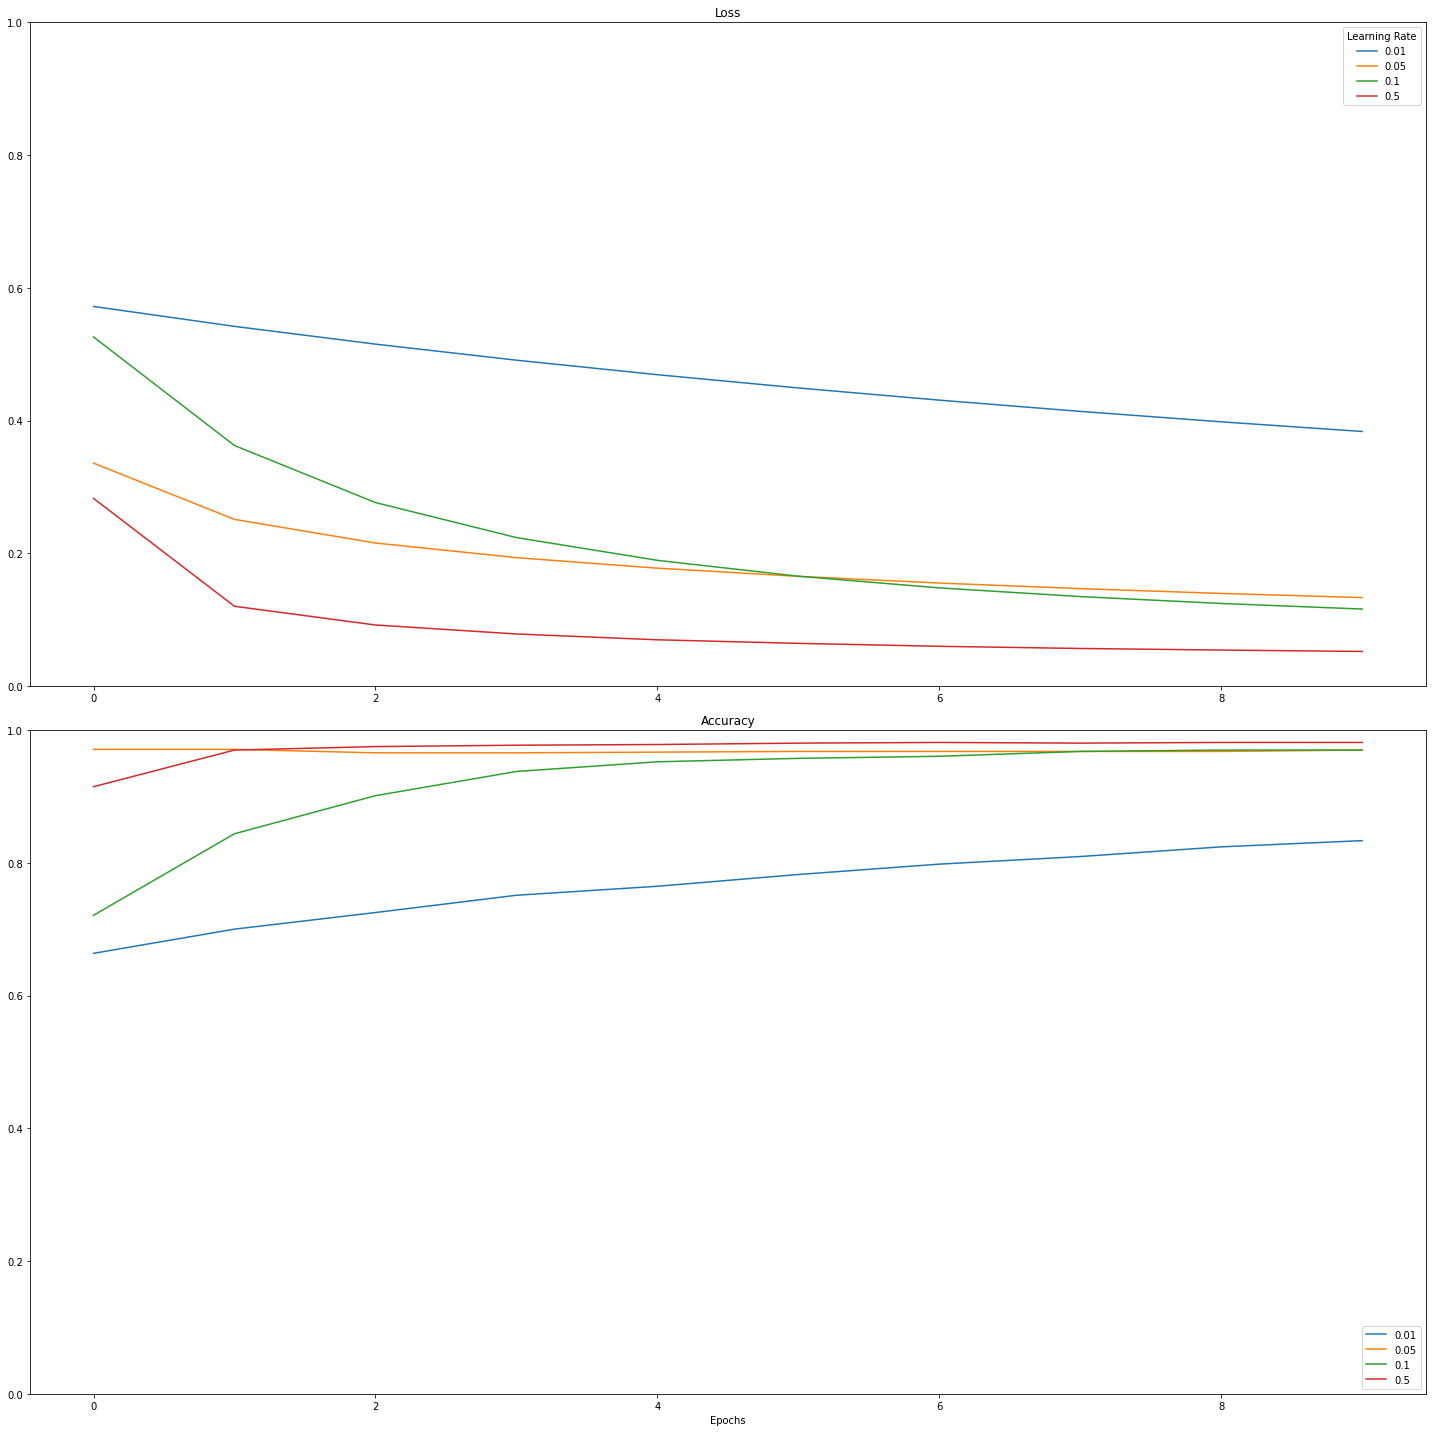

In [27]:
plt.figure(figsize=(20,20))
ax =plt.subplot(211)
historydf.xs('loss',axis=1,level='Metric').plot(ylim=(0,1),ax=ax)
plt.title('Loss')


ax =plt.subplot(212)
historydf.xs('accuracy',axis=1,level='Metric').plot(ylim=(0,1),ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc=4)
plt.tight_layout()

### Batch Sizing

In [43]:

dflist = []
batch_sizes = [16,32,64,128]

for batch_size in batch_sizes:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train,y_train, batch_size=batch_size,verbose=0,epochs=10)
    
    dflist.append(pd.DataFrame(h.history,index=h.epoch))
    

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [40]:
historydf = pd.concat(dflist,axis=1)
metrics_reported = dflist[0].columns
indx = pd.MultiIndex.from_product([batch_sizes,metrics_reported],
                                  names=['Batch Size','Metric'])
historydf.columns = indx

In [41]:
historydf

Batch Size       16                  32                  64             \
Metric          loss  accuracy      loss  accuracy      loss  accuracy   
0           0.764455  0.544792  0.557133  0.701042  0.747235  0.468750   
1           0.696993  0.628125  0.543232  0.711458  0.723322  0.515625   
2           0.644157  0.686458  0.530155  0.721875  0.701685  0.568750   
3           0.601719  0.720833  0.517816  0.732292  0.682127  0.602083   
4           0.566681  0.745833  0.506059  0.738542  0.664328  0.629167   
5           0.537058  0.766667  0.494885  0.742708  0.648082  0.644792   
6           0.511474  0.782292  0.484244  0.748958  0.633102  0.662500   
7           0.488943  0.789583  0.474063  0.759375  0.619302  0.677083   
8           0.468907  0.798958  0.464368  0.768750  0.606437  0.686458   
9           0.450875  0.807292  0.455030  0.776042  0.594497  0.701042   

Batch Size       128            
Metric          loss  accuracy  
0           0.488800  0.808333  
1           0.481717  0.820833  
2           0.474900  0.830208  
3           0.468423  0.837500  
4           0.462183  0.837500  
5           0.456264  0.841667  
6           0.450673  0.845833  
7           0.445268  0.846875  
8           0.440170  0.850000  
9           0.435229  0.852083

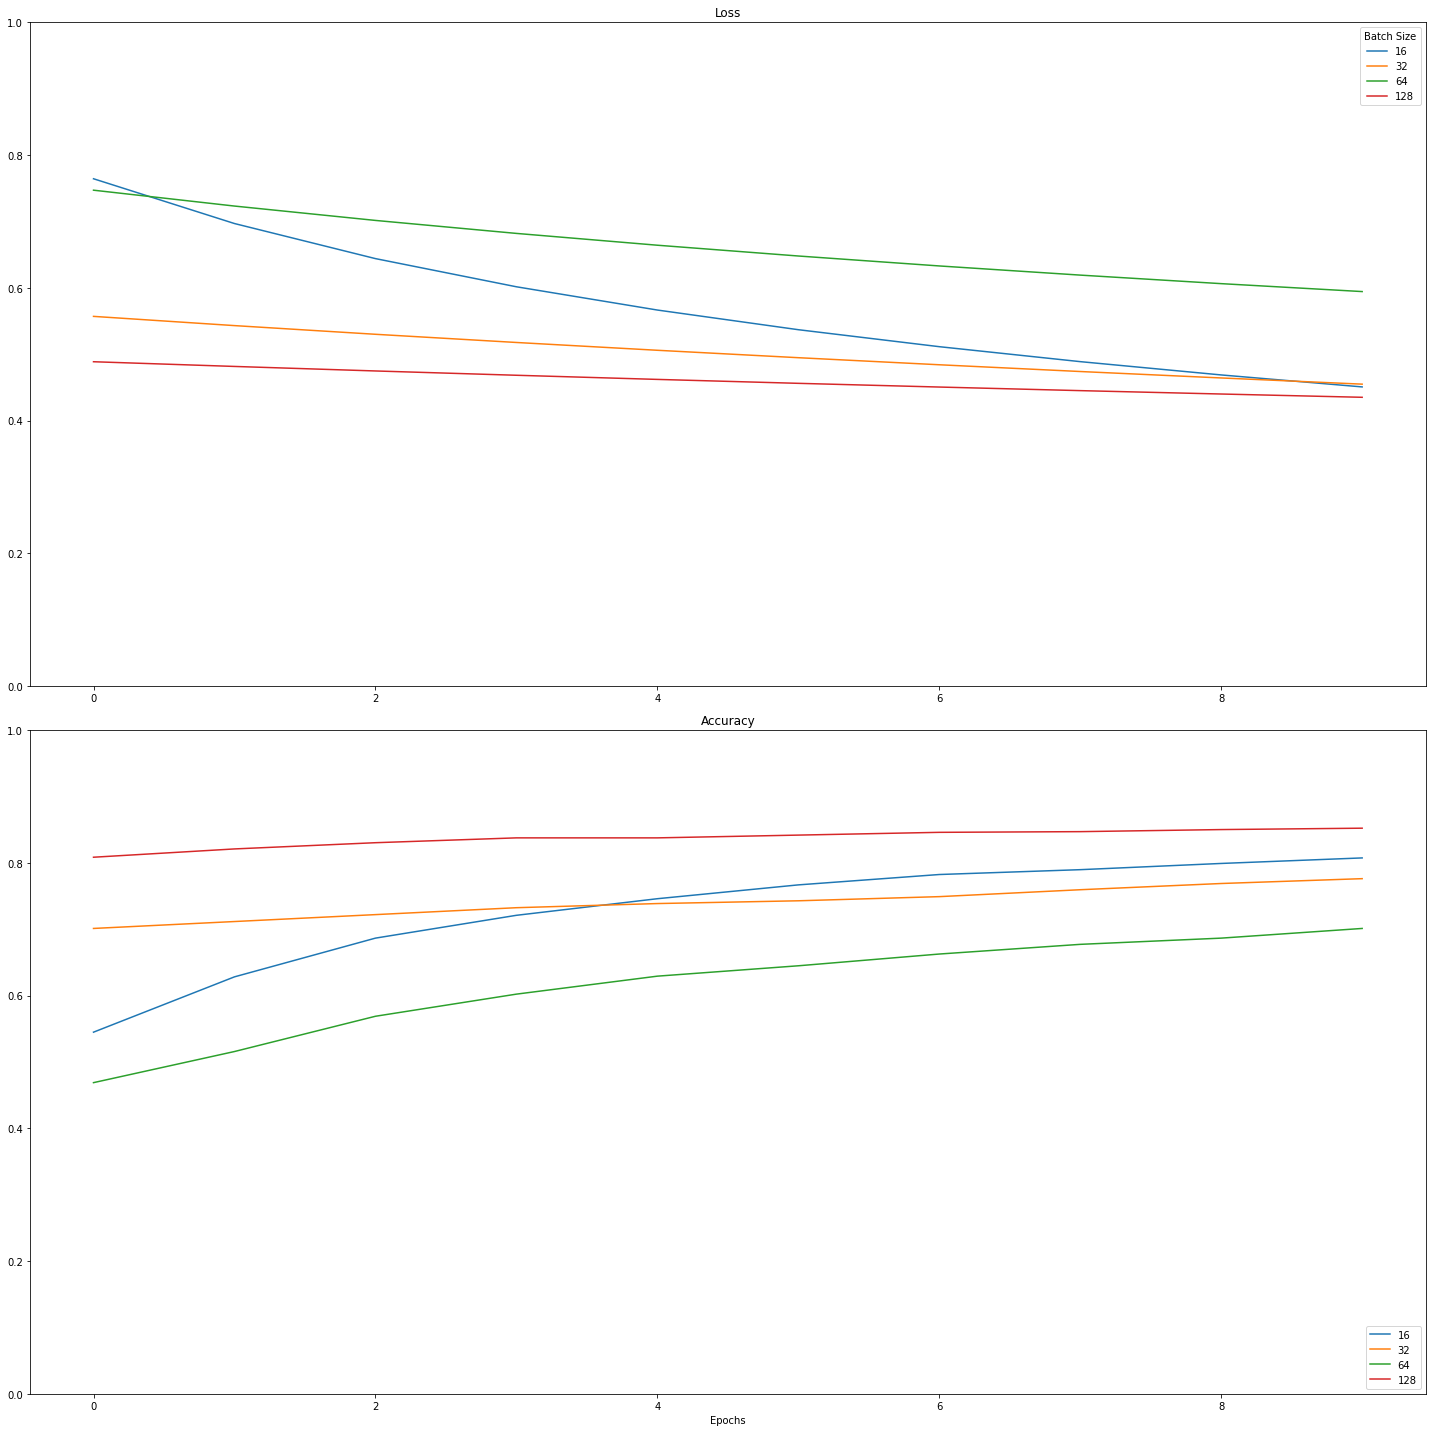

In [42]:
plt.figure(figsize=(20,20))
ax =plt.subplot(211)
historydf.xs('loss',axis=1,level='Metric').plot(ylim=(0,1),ax=ax)
plt.title('Loss')


ax =plt.subplot(212)
historydf.xs('accuracy',axis=1,level='Metric').plot(ylim=(0,1),ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc=4)
plt.tight_layout()

### Optimizers

In [44]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [47]:

dflist = []
optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01,momentum=0.3)',
              'SGD(lr=0.01,momentum=0.3, nesterov=True)',
              'Adam(lr-0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train,y_train, batch_size=16,verbose=0,epochs=5)
    
    dflist.append(pd.DataFrame(h.history,index=h.epoch))

    
historydf = pd.concat(dflist,axis=1)
metrics_reported = dflist[0].columns
indx = pd.MultiIndex.from_product([optimizers,metrics_reported],
                                  names=['Batch Size','Metric'])
historydf.columns = indx

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

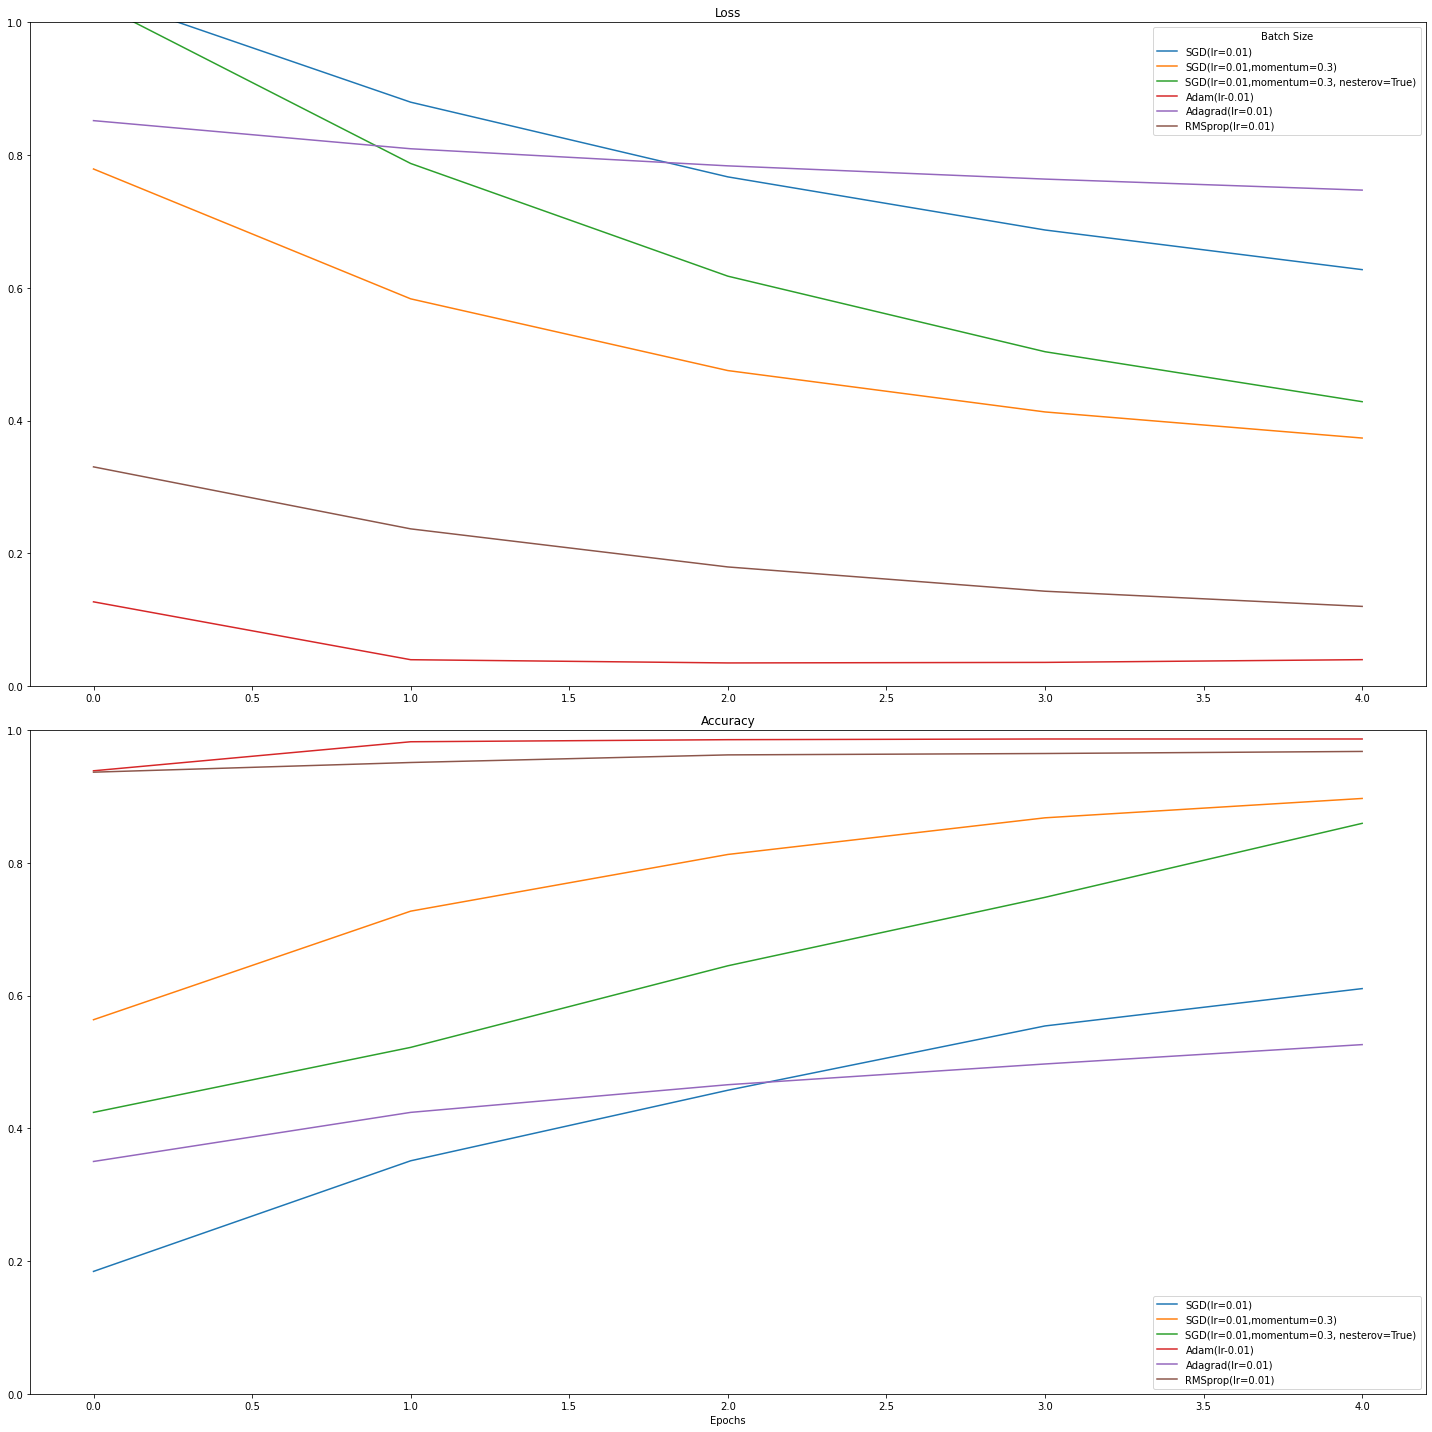

In [48]:
plt.figure(figsize=(20,20))
ax =plt.subplot(211)
historydf.xs('loss',axis=1,level='Metric').plot(ylim=(0,1),ax=ax)
plt.title('Loss')


ax =plt.subplot(212)
historydf.xs('accuracy',axis=1,level='Metric').plot(ylim=(0,1),ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc=4)
plt.tight_layout()

### Initializers
* Initial weights of a model
* Keras has base values you could provide, this next section explores them. 

In [50]:

dflist = []
initializers = ['zeros',
              'uniform', # Between 0 -1
              'normal', # Gaussian Dist
              'he_normal', # Rescaled Gaussian Distribution - Based on Nodes
              'lecun_uniform'] # Rescaled Unifrom - Based on Nodes

for init in initializers:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,),kernel_initializer = init, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    h = model.fit(X_train,y_train, batch_size=16,verbose=0,epochs=5)
    
    dflist.append(pd.DataFrame(h.history,index=h.epoch))

    
historydf = pd.concat(dflist,axis=1)
metrics_reported = dflist[0].columns
indx = pd.MultiIndex.from_product([initializers,metrics_reported],
                                  names=['Initializers','Metric'])
historydf.columns = indx


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

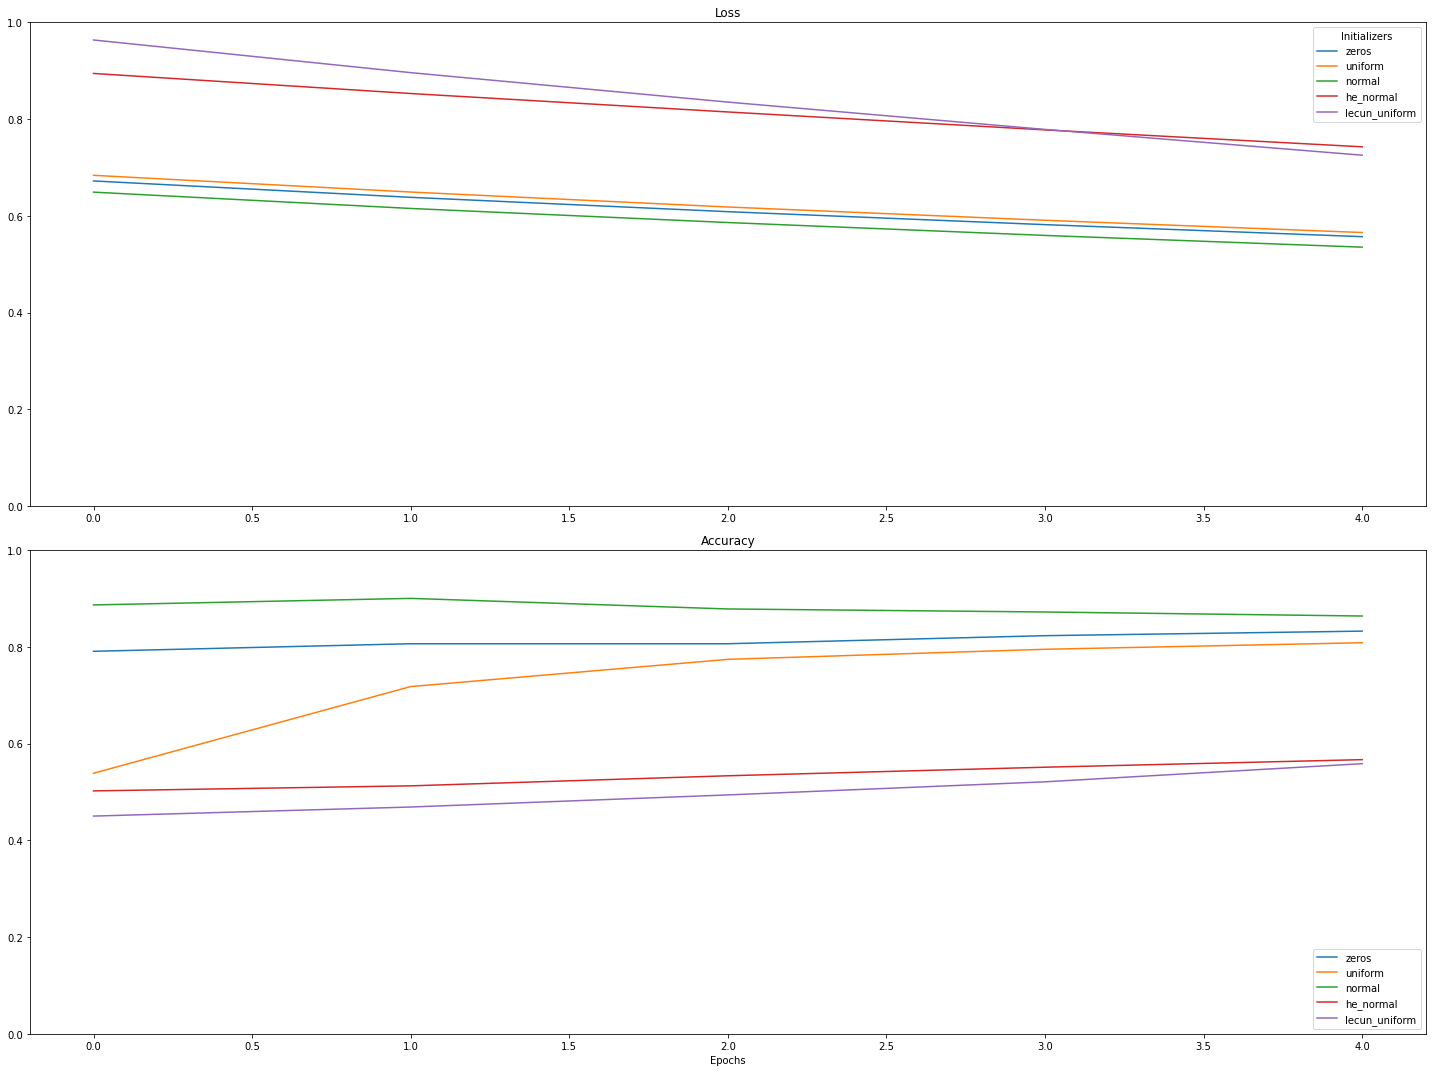

In [53]:
plt.figure(figsize=(20,15))
ax =plt.subplot(211)
historydf.xs('loss',axis=1,level='Metric').plot(ylim=(0,1),ax=ax)
plt.title('Loss')


ax =plt.subplot(212)
historydf.xs('accuracy',axis=1,level='Metric').plot(ylim=(0,1),ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc=4)
plt.tight_layout()

### Inner Layer Representation / Visualization

In [55]:

K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])
h = model.fit(X_train,y_train, batch_size=16, epochs=20,verbose=1,validation_split=0.3)

result = model.evaluate(X_test,y_test)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/42 [..............................] - ETA: 14s - loss: 0.6627 - accuracy: 0.8125WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fc4c5429560> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

In [56]:
result

[0.029252739623188972, 0.987864077091217]

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.layers

In [59]:
inp = model.layers[0].input
out = model.layers[0].output

In [60]:
inp

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_input')>

In [61]:
out

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>

In [62]:
features_function = K.function([inp],[out])

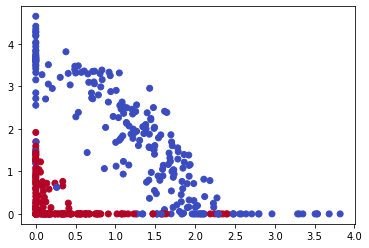

In [70]:
features = features_function([X_test])[0]
plt.scatter(features[:,0],features[:,1],c=y_test,cmap='coolwarm')

**This is the visual of how the network is learning to seperate the bank note features**

In [67]:

K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])


13/13 [==============================] - 0s 638us/step - loss: 0.0030 - accuracy: 1.0000


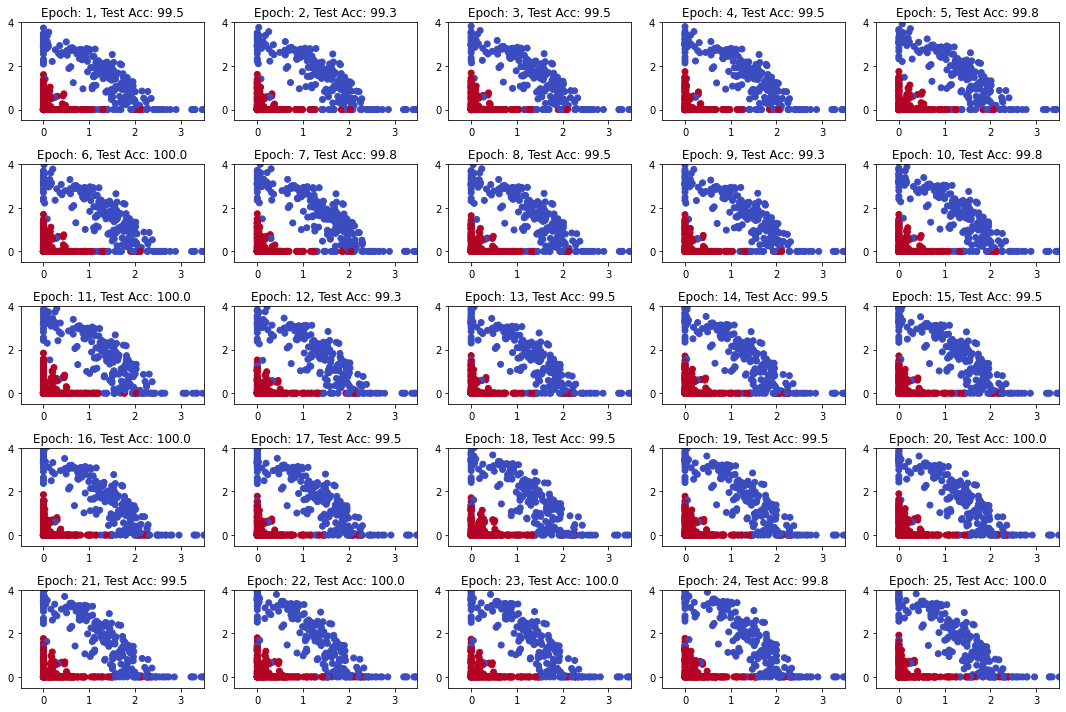

In [69]:
inp = model.layers[0].input
out = model.layers[0].output
features_function = K.function([inp],[out])

plt.figure(figsize=(15,10))

for i in range(1,26):
    plt.subplot(5,5,i)
    h = model.fit(X_train,y_train,batch_size=16,epochs=1,verbose=0)
    test_accuracy = model.evaluate(X_test,y_test)[1] * 100
    features = features_function([X_test])[0]
    plt.scatter(features[:,0],features[:,1],c=y_test,cmap='coolwarm')
    plt.xlim(-0.5,3.5)
    plt.ylim(-0.5,4.0)
    plt.title(f'Epoch: {i}, Test Acc: {test_accuracy:3.1f}')
plt.tight_layout()